In [95]:
%matplotlib inline

In [96]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('./dataset/weatherHistory.csv')

In [98]:
df

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,0.89,14.1197,251,15.8263,0,1015.13
1,9.355556,0.86,14.2646,259,15.8263,0,1015.63
2,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,8.288889,0.83,14.1036,269,15.8263,0,1016.41
4,8.755556,0.83,11.0446,259,15.8263,0,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31,16.1000,0,1014.36
96449,24.583333,0.48,10.0947,20,15.5526,0,1015.16
96450,22.038889,0.56,8.9838,30,16.1000,0,1015.66
96451,21.522222,0.60,10.5294,20,16.1000,0,1015.95


In [99]:
x = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']]
y = df['Temperature (C)']

x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32).reshape(-1, 1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [101]:
steps = [
    ('scaling', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=4)),
    ('ridge', Ridge(fit_intercept=True)),
]

In [102]:
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=4)),
                ('ridge', Ridge())])

In [103]:
pipe.score(X_test, y_test)

0.617437718346384

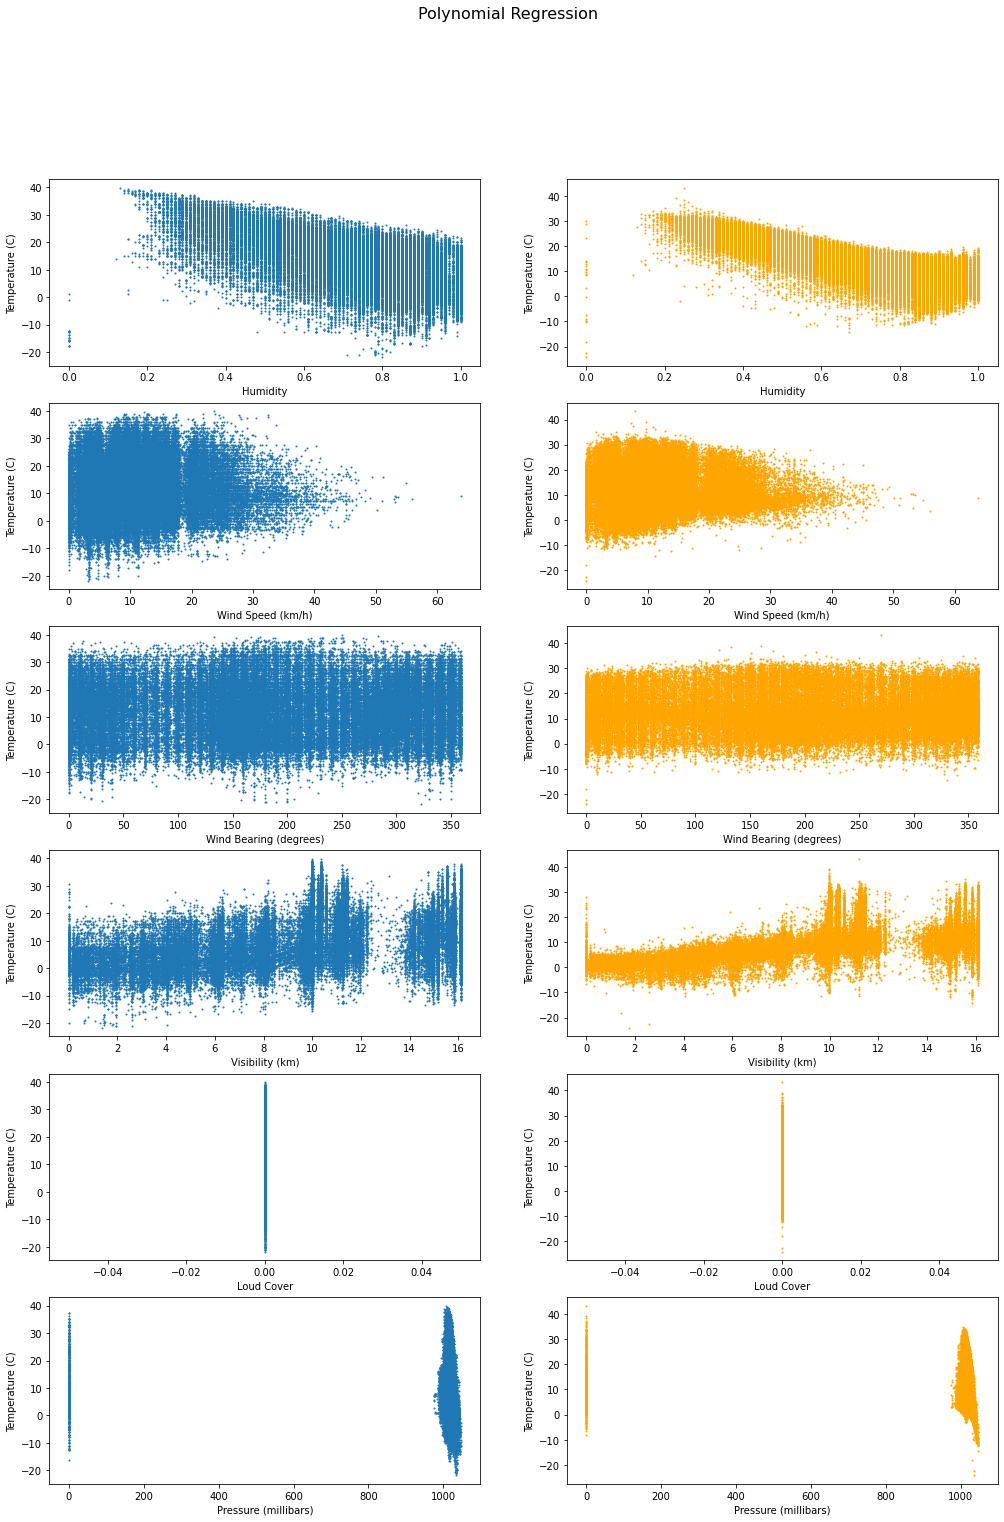

In [105]:
fig, axs = plt.subplots(6, 2)
fig.set_figwidth(17)
fig.set_figheight(24)
fig.suptitle('Polynomial Regression', fontsize=16)
predicted = pipe.predict(x)

axs[0,0].scatter(df['Humidity'], df['Temperature (C)'], s=1)
axs[0,0].set(xlabel= 'Humidity', ylabel = 'Temperature (C)')
axs[0,1].scatter(df['Humidity'], predicted, color='orange', s=1)
axs[0,1].set(xlabel= 'Humidity', ylabel = 'Temperature (C)')

axs[1,0].scatter(df['Wind Speed (km/h)'], df['Temperature (C)'], s=1)
axs[1,0].set(xlabel= 'Wind Speed (km/h)', ylabel = 'Temperature (C)')
axs[1,1].scatter(df['Wind Speed (km/h)'], predicted, color='orange', s=1)
axs[1,1].set(xlabel= 'Wind Speed (km/h)', ylabel = 'Temperature (C)')

axs[2,0].scatter(df['Wind Bearing (degrees)'], df['Temperature (C)'], s=1)
axs[2,0].set(xlabel= 'Wind Bearing (degrees)', ylabel = 'Temperature (C)')
axs[2,1].scatter(df['Wind Bearing (degrees)'], predicted, color='orange', s=1)
axs[2,1].set(xlabel= 'Wind Bearing (degrees)', ylabel = 'Temperature (C)')

axs[3,0].scatter(df['Visibility (km)'], df['Temperature (C)'], s=1)
axs[3,0].set(xlabel= 'Visibility (km)', ylabel = 'Temperature (C)')
axs[3,1].scatter(df['Visibility (km)'], predicted, color='orange', s=1)
axs[3,1].set(xlabel= 'Visibility (km)', ylabel = 'Temperature (C)')

axs[4,0].scatter(df['Loud Cover'], df['Temperature (C)'], s=1)
axs[4,0].set(xlabel= 'Loud Cover', ylabel = 'Temperature (C)')
axs[4,1].scatter(df['Loud Cover'], predicted, color='orange', s=1)
axs[4,1].set(xlabel= 'Loud Cover', ylabel = 'Temperature (C)')

axs[5,0].scatter(df['Pressure (millibars)'], df['Temperature (C)'], s=1)
axs[5,0].set(xlabel= 'Pressure (millibars)', ylabel = 'Temperature (C)')
axs[5,1].scatter(df['Pressure (millibars)'], predicted, color='orange', s=1)
axs[5,1].set(xlabel= 'Pressure (millibars)', ylabel = 'Temperature (C)')

fig.set_facecolor('white')
plt.show()